In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [56]:
df = pd.read_csv("../../../traces/workload_traces/workloads.csv")
df = df[df['platform'] == 'platform-0']
datasets = list(df['dataset'])
algorithms = list(df['algorithm'])
df.head()

,dataset,family,algorithm,platform,run,duration,schedulerDelay,executorRunTime,executorCpuTime,executorDeserializeTime,...,peakExecutionMemory,bytesRead,shuffleFetchWaitTime,shuffleTotalBytesRead,shuffleTotalBlocksFetched,shuffleLocalBlocksFetched,shuffleRemoteBlocksFetched,shuffleWriteTime,shuffleBytesWritten,fitTime
25,DHG,clustering,BKM,platform-0,0,17659195,128151,17384950,11387091,145831,...,167220911,184898948086,11,4147111,6880,172,6708,1225,4147111,154268.0
86,DHG,clustering,KM,platform-0,0,2460043,166627,2144081,1271561,148948,...,166841115,93470581548,17,3325656,8000,200,7800,1557,3325656,23986.0
147,DHG,clustering,GMM,platform-0,0,3978738,65534,3811085,2722073,101836,...,187344416,71467580940,65,22957409,3360,88,3272,1382,22957409,41089.0
208,DHG,classification,MLP,platform-0,0,28939205,230008,28464293,27159748,244315,...,11525196032,222962779362,1087,439793063,18080,442,17638,426,439793063,201822.0
269,DHG,classification,DT,platform-0,0,4076430,84125,3890030,2411518,101949,...,46499059786,48354541616,16113,483366273,96480,2412,94068,2941,483366273,37718.0


In [57]:
df.columns

Index(['dataset', 'family', 'algorithm', 'platform', 'run', 'duration',
       'schedulerDelay', 'executorRunTime', 'executorCpuTime',
       'executorDeserializeTime', 'executorDeserializeCpuTime',
       'resultSerializationTime', 'jvmGCTime', 'resultSize',
       'peakExecutionMemory', 'bytesRead', 'shuffleFetchWaitTime',
       'shuffleTotalBytesRead', 'shuffleTotalBlocksFetched',
       'shuffleLocalBlocksFetched', 'shuffleRemoteBlocksFetched',
       'shuffleWriteTime', 'shuffleBytesWritten', 'fitTime'],
      dtype='object')

In [58]:
features = list(df.columns)[5:]
x = df.loc[:, features]
x = StandardScaler().fit_transform(x.values)
x[0]

array([ 3.08140701,  1.01232947,  3.10804962,  2.25060247,  0.35345518,
       -0.09565679, -0.10058351,  2.06781865, -0.16398287, -0.52268695,
        2.63318389, -0.24231247, -0.34447305, -0.17692734, -0.17733566,
       -0.17691686, -0.04792774, -0.34447305,  1.97057271])

In [59]:
np.mean(x, axis=0)

array([ 1.42005271e-17, -7.74574203e-18, -3.61467962e-17,  7.74574203e-18,
       -2.84010541e-17,  2.84010541e-17, -2.32372261e-17,  4.38925382e-17,
       -3.87287102e-18,  6.45478503e-18,  2.71100971e-17,  1.29095701e-17,
       -1.03276560e-17, -6.45478503e-19,  4.51834952e-18, -1.29095701e-18,
       -1.29095701e-17, -1.03276560e-17, -2.32372261e-17])

In [60]:
np.std(x,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [61]:
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component {}'.format(i) for i in range(1, len(features) + 1)])

principalDf['dataset'] = datasets
principalDf['algorithm'] = algorithms

In [62]:
pca.explained_variance_ratio_

array([5.51390020e-01, 2.12863183e-01, 1.22018834e-01, 4.65012884e-02,
       3.63153783e-02, 1.37316848e-02, 7.95804776e-03, 3.73328947e-03,
       2.40170423e-03, 1.20648600e-03, 7.57882420e-04, 5.43514492e-04,
       3.88267305e-04, 1.71182244e-04, 1.91568527e-05, 8.07498429e-08,
       5.66751046e-12, 1.44699005e-34, 5.15724938e-35])

In [63]:
# See the following link
# http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf

n = len(features)
eigenValues = (n-1)/n * pca.explained_variance_
eigenValues

array([1.01613304e+01, 3.92276437e+00, 2.24863281e+00, 8.56952315e-01,
       6.69240543e-01, 2.53055335e-01, 1.46655452e-01, 6.87991917e-02,
       4.42599779e-02, 2.22338134e-02, 1.39666903e-02, 1.00161956e-02,
       7.15521176e-03, 3.15464422e-03, 3.53033428e-04, 1.48810425e-06,
       1.04444121e-10, 2.66659595e-33, 9.50407385e-34])

In [64]:
pca.explained_variance_

array([1.07258487e+01, 4.14069572e+00, 2.37355685e+00, 9.04560777e-01,
       7.06420573e-01, 2.67113965e-01, 1.54802977e-01, 7.26213690e-02,
       4.67188655e-02, 2.34690253e-02, 1.47426176e-02, 1.05726509e-02,
       7.55272352e-03, 3.32990223e-03, 3.72646397e-04, 1.57077671e-06,
       1.10246573e-10, 2.81474017e-33, 1.00320780e-33])

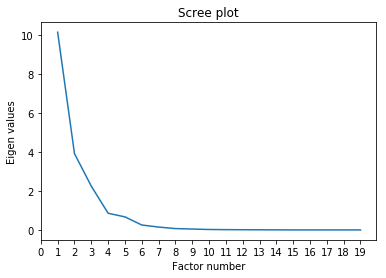

In [65]:
#scree plot
plt.plot(np.arange(1,n+1),eigenValues)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.xticks(np.arange(0, n+1, 1.0))
plt.show()

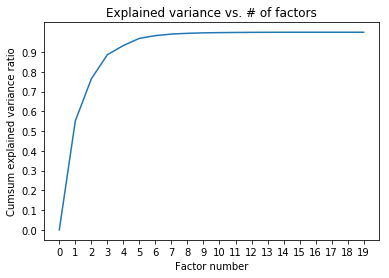

In [66]:
#cumul de variance expliquée
plt.plot(np.arange(0,n+1),[0] + list(np.cumsum(pca.explained_variance_ratio_)))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.xticks(np.arange(0, n+1, 1.0))
plt.yticks(np.arange(0, 1, 0.1))
plt.show()

In [67]:
# Pour savoir combien de composantes principales prendre
#seuils pour test des bâtons brisés
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Val.Propre':eigenValues,'Seuils':bs}))

      Seuils    Val.Propre
0   3.547740  1.016133e+01
1   2.547740  3.922764e+00
2   2.047740  2.248633e+00
3   1.714406  8.569523e-01
4   1.464406  6.692405e-01
5   1.264406  2.530553e-01
6   1.097740  1.466555e-01
7   0.954883  6.879919e-02
8   0.829883  4.425998e-02
9   0.718771  2.223381e-02
10  0.618771  1.396669e-02
11  0.527862  1.001620e-02
12  0.444529  7.155212e-03
13  0.367606  3.154644e-03
14  0.296177  3.530334e-04
15  0.229511  1.488104e-06
16  0.167011  1.044441e-10
17  0.108187  2.666596e-33
18  0.052632  9.504074e-34


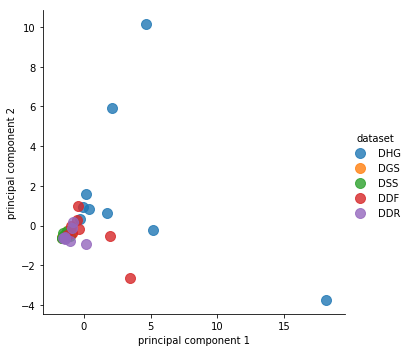

In [68]:
# Create scatterplot of principal components 1 & 2
sns.lmplot('principal component 1', # Horizontal axis
           'principal component 2', # Vertical axis
           data=principalDf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="dataset", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size


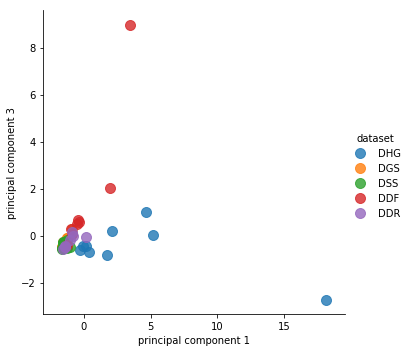

In [69]:
# Create scatterplot of principal components 1 & 2
sns.lmplot('principal component 1', # Horizontal axis
           'principal component 3', # Vertical axis
           data=principalDf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="dataset", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size


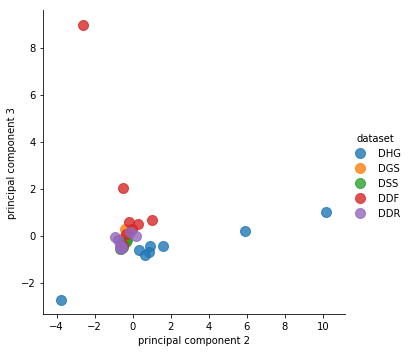

In [70]:
# Create scatterplot of principal components 2 & 3
sns.lmplot('principal component 2', # Horizontal axis
           'principal component 3', # Vertical axis
           data=principalDf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="dataset", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size


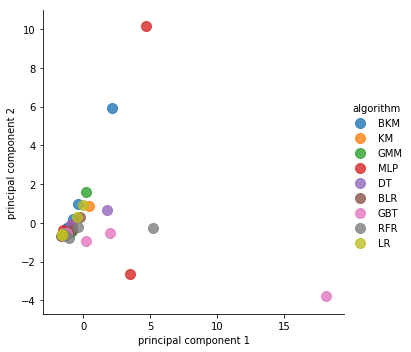

In [101]:
# Create scatterplot of principal components 1 & 2
sns.lmplot('principal component 1', # Horizontal axis
           'principal component 2', # Vertical axis
           data=principalDf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="algorithm", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size


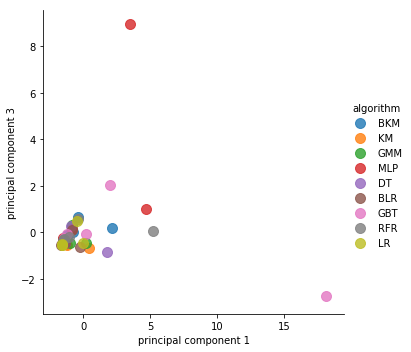

In [102]:
# Create scatterplot of principal components 1 & 2
sns.lmplot('principal component 1', # Horizontal axis
           'principal component 3', # Vertical axis
           data=principalDf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="algorithm", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size


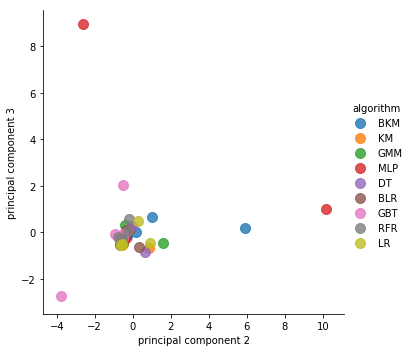

In [103]:
# Create scatterplot of principal components 2 & 3
sns.lmplot('principal component 2', # Horizontal axis
           'principal component 3', # Vertical axis
           data=principalDf, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="algorithm", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size


# The principal components are impacted by the dataset more than so by the algorithms

When separating by the dataset, we tend to see clusters. A thing that does not happen with algorithms

In [118]:
## Qualité de représentation des individus par les composantes principales

# Evaluation de la PCA
di = np.sum(x**2,axis=1)

#qualité de représentation des individus -COS2
cos2 = principalComponents**2
for j in range(n):
    cos2[:,j] = cos2[:,j]/di

qlt_ind_pc = pd.DataFrame({'id': principalDf['workload'], 'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2], 'dataset': datasets, 'algorithm': algorithms})
qlt_ind_pc.head()

,COS2_1,COS2_2,COS2_3,algorithm,dataset,id
0,0.108274,0.849118,0.000902,BKM,DHG,DHGBKM
1,0.032074,0.126261,0.080255,KM,DHG,DHGKM
2,0.006508,0.365037,0.031395,GMM,DHG,DHGGMM
3,0.169000,0.811095,0.007629,MLP,DHG,DHGMLP
4,0.245596,0.032803,0.054384,DT,DHG,DHGDT


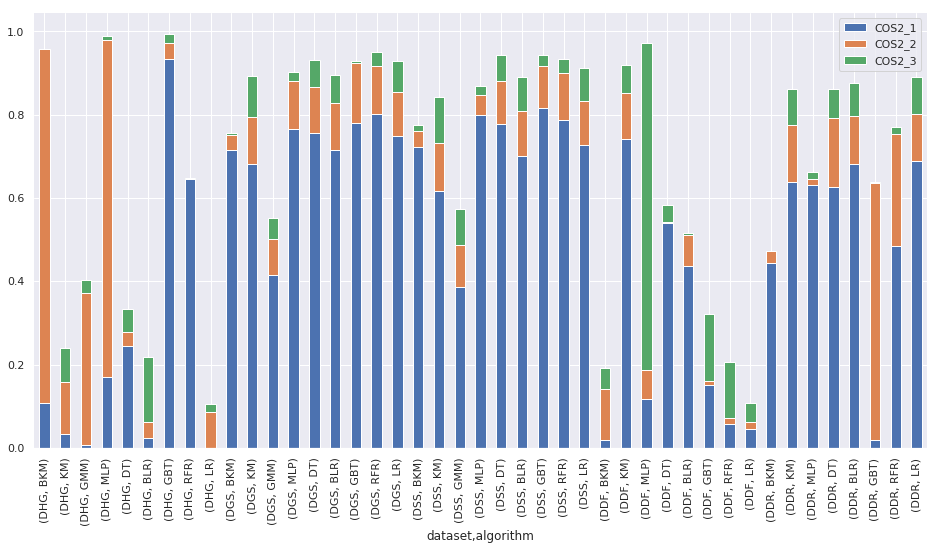

In [152]:
fig, axes = plt.subplots(figsize=(16,8))
sns.set()
sns.despine(left=True)
qlt_ind_pc.set_index(['dataset', 'algorithm']).plot(kind='bar', stacked=True, ax=axes, sort_columns=True)

DHG and DDF workloads are not very explained by the 3 chosen principal components.
All the others are well captured.
Regression algorithms are very poorly captured by the 3 PCs with the DDF dataset

PC1 explains the majority of the workloads.
However, PC1 does not explain DHG at all, except for GBT and RFR. Most DHG workloads are explained by PC2

With DDF, PC3 is more impactful than usual
With DDR, PC2 is more impactful than usual

MLP is pretty well expalined by PC2 with DHG, and PC3 with DDF

In [81]:
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [159]:
## contributions des individus aux axes

ctr = principalComponents**2
for j in range(n):
    ctr[:,j] = ctr[:,j]/(principalDf.shape[0]*eigenValues[j])
    
qlt_pc_ind = pd.DataFrame({'id':principalDf['workload'],'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2], 'dataset': datasets, 'algorithm': algorithms})
qlt_pc_ind.head()

,CTR_1,CTR_2,CTR_3,algorithm,dataset,id
0,0.010203,0.207269,0.000384,BKM,DHG,DHGBKM
1,0.000427,0.004349,0.004823,KM,DHG,DHGKM
2,0.000102,0.014809,0.002222,GMM,DHG,DHGGMM
3,0.049295,0.612842,0.010056,MLP,DHG,DHGMLP
4,0.007245,0.002507,0.007250,DT,DHG,DHGDT


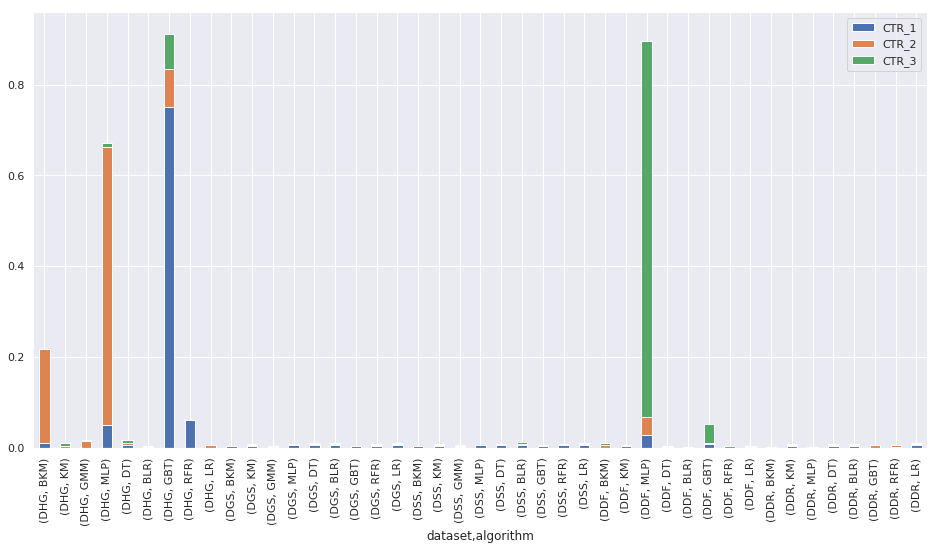

In [160]:
fig, axes = plt.subplots(figsize=(16,8))
sns.set()
sns.despine(left=True)
qlt_pc_ind.set_index(['dataset', 'algorithm']).plot(kind='bar', stacked=True, ax=axes, sort_columns=True)

The major workloads that impact PC1 are (DHG, GBT), (DHG, RFR), (DHG, MLP), (DHG, BKM) and (DDF, MLP)

The major workloads that impact PC2 are (DHG, BKM), (DHG, MLP)

The major workloads that impact PC3 are (DDF, MLP) and (DDF, GBT)

In [86]:
print(np.sum(ctr,axis=0))

[1.03100775 1.03100775 1.03100775 1.03100775 1.03100775 1.03100775
 1.03100775 1.03100775 1.03100775 1.03100775 1.03100775 1.03100775
 1.03100775 1.03100775 1.03100775 1.03100775 1.03100775 1.03100775
 1.03100775]


In [87]:
# Vecteurs propres
pca.components_

array([[ 1.33657204e-01,  2.82583187e-01,  1.22526943e-01,
         1.12320006e-01,  2.82440282e-01,  2.60717449e-01,
         1.71074702e-01,  1.93980299e-01,  6.06620410e-02,
         2.01237468e-01,  2.47597906e-01,  2.81708305e-01,
         2.64788603e-01,  2.82473702e-01,  2.82354861e-01,
         2.82476733e-01,  2.92302788e-01,  2.64788603e-01,
         1.00977530e-01],
       [ 4.41867236e-01,  8.38648675e-02,  4.49144825e-01,
         4.48221418e-01, -2.74530436e-02, -8.15891404e-02,
        -8.87924008e-02,  3.11481885e-01, -9.22488456e-02,
        -2.97243190e-02,  2.45160725e-01, -1.28452557e-01,
        -1.67205667e-01, -1.33880084e-01, -1.34059878e-01,
        -1.33875466e-01, -1.41563680e-01, -1.67205667e-01,
         2.58842546e-01],
       [ 3.71833855e-02, -1.50146226e-01,  4.15947643e-02,
         5.48577051e-02, -4.14425824e-02,  6.44980345e-02,
         5.23660195e-01, -5.92915018e-02,  5.98106083e-01,
         1.66693364e-02, -1.11246430e-01, -1.66083437e-01,
    

In [88]:
sum([ 1.33657204e-01,  2.82583187e-01,  1.22526943e-01,
         1.12320006e-01,  2.82440282e-01,  2.60717449e-01,
         1.71074702e-01,  1.93980299e-01,  6.06620410e-02,
         2.01237468e-01,  2.47597906e-01,  2.81708305e-01,
         2.64788603e-01,  2.82473702e-01,  2.82354861e-01,
         2.82476733e-01,  2.92302788e-01,  2.64788603e-01,
         1.00977530e-01])

4.120668611999999

In [97]:
# Les corrélations entres facteurs et variables

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigenValues)
#corrélation des variables avec les axes
corvar = np.zeros((n, n))
for k in range(n):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
    
#afficher la matrice des corrélations variables x facteurs    
#print(corvar)

#on affiche pour les deux premiers axes
print(pd.DataFrame({'id': features,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:, 2]}))

       COR_1     COR_2     COR_3                          id
0   0.426057  0.875161  0.055758                    duration
1   0.900786  0.166103 -0.225151              schedulerDelay
2   0.390577  0.889575  0.062373             executorRunTime
3   0.358041  0.887746  0.082262             executorCpuTime
4   0.900330 -0.054373 -0.062145     executorDeserializeTime
5   0.831085 -0.161595  0.096718  executorDeserializeCpuTime
6   0.545332 -0.175862  0.785252     resultSerializationTime
7   0.618348  0.616920 -0.088910                   jvmGCTime
8   0.193371 -0.182708  0.896887                  resultSize
9   0.641481 -0.058872  0.024996         peakExecutionMemory
10  0.789264  0.485565 -0.166819                   bytesRead
11  0.897997 -0.254413 -0.249049        shuffleFetchWaitTime
12  0.844062 -0.331167  0.333423       shuffleTotalBytesRead
13  0.900437 -0.265162 -0.272251   shuffleTotalBlocksFetched
14  0.900058 -0.265519 -0.273122   shuffleLocalBlocksFetched
15  0.900447 -0.265153 -

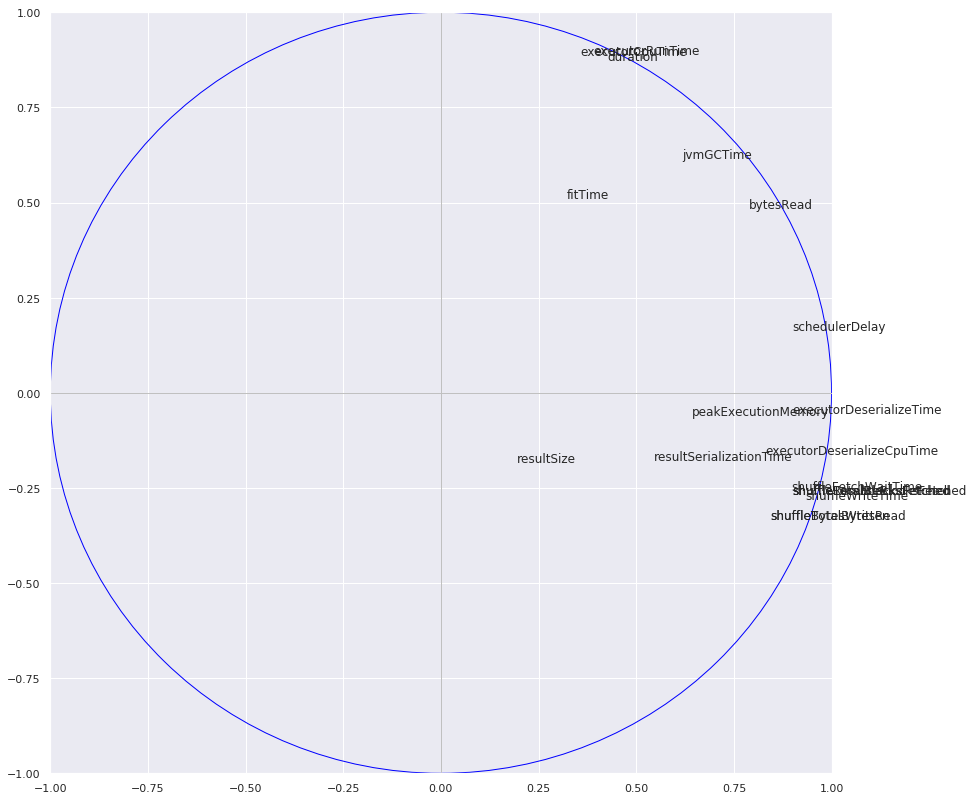

In [168]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(14,14))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes(noms des variables)
for j in range(n):
    plt.annotate(features[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

Strong correlation is considered at 0.7

PC3 is highly correlated with: resultSize & resultSerializationTime

PC2 is highly correlated with: duration, executorRunTime & executorCpuTime

PC1 is highly correlated with: schedulerDelay, executorDeserializeTime, executorDeserializeCpuTime, bytesRead, shuffleFetchWaitTime, shuffleTotalBytesRead, shuffleTotalBlocksFetched, shuffleLocalBlocksFetched, shuffleRemoteBlocksFetched, shuffleWriteTime & shuffleBytesWritten

PC3 <==> Output Computation

PC2 <==> Execution Time

PC1 <==> Dataset Complexity

In [99]:
# Qualité de représenatation des variables par les composantes principales

#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':features,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'COS2_3':cos2var[:,2]}))

      COS2_1    COS2_2    COS2_3                          id
0   0.181525  0.765907  0.003109                    duration
1   0.811415  0.027590  0.050693              schedulerDelay
2   0.152551  0.791343  0.003890             executorRunTime
3   0.128193  0.788093  0.006767             executorCpuTime
4   0.810595  0.002956  0.003862     executorDeserializeTime
5   0.690702  0.026113  0.009354  executorDeserializeCpuTime
6   0.297387  0.030927  0.616620     resultSerializationTime
7   0.382354  0.380590  0.007905                   jvmGCTime
8   0.037393  0.033382  0.804405                  resultSize
9   0.411499  0.003466  0.000625         peakExecutionMemory
10  0.622938  0.235773  0.027829                   bytesRead
11  0.806399  0.064726  0.062026        shuffleFetchWaitTime
12  0.712441  0.109672  0.111171       shuffleTotalBytesRead
13  0.810787  0.070311  0.074121   shuffleTotalBlocksFetched
14  0.810105  0.070500  0.074596   shuffleLocalBlocksFetched
15  0.810804  0.070306  

In [171]:
#contributions
ctrvar = cos2var
for k in range(n):
    ctrvar[:,k] = ctrvar[:,k]/eigenValues[k]
    
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':features,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1], 'CTR_3': ctrvar[:,2]}))

       CTR_1     CTR_2     CTR_3                          id
0   0.017864  0.195247  0.001383                    duration
1   0.079853  0.007033  0.022544              schedulerDelay
2   0.015013  0.201731  0.001730             executorRunTime
3   0.012616  0.200902  0.003009             executorCpuTime
4   0.079773  0.000754  0.001717     executorDeserializeTime
5   0.067974  0.006657  0.004160  executorDeserializeCpuTime
6   0.029267  0.007884  0.274220     resultSerializationTime
7   0.037628  0.097021  0.003515                   jvmGCTime
8   0.003680  0.008510  0.357731                  resultSize
9   0.040497  0.000884  0.000278         peakExecutionMemory
10  0.061305  0.060104  0.012376                   bytesRead
11  0.079360  0.016500  0.027584        shuffleFetchWaitTime
12  0.070113  0.027958  0.049439       shuffleTotalBytesRead
13  0.079791  0.017924  0.032962   shuffleTotalBlocksFetched
14  0.079724  0.017972  0.033174   shuffleLocalBlocksFetched
15  0.079793  0.017923  